In [1]:
from IPython.core.display import HTML
HTML('''
<script>
var logoParent = document.getElementById("kernel_logo_widget")
var logo = document.getElementById("kernel_logo_widget").getElementsByClassName("current_kernel_logo")[0];
logo.src = "https://i.ibb.co/mD4jTGQ/itclogo.jpg";
logo.style = "display: inline; width:138px; height:40px";
logoParent.innerHTML = '<a href="https://i.ibb.co/mD4jTGQ/itclogo.jpg">' + logoParent.innerHTML + '</a>';
</script>
''')

<font size=10><b>Exploratory Data Analysis (EDA)</b></font>

<img width = 100 src="https://img.freepik.com/free-photo/magnifying-glass_1156-674.jpg">

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('bright')
%matplotlib inline

# (Work)Sheet just got real
Now it's time to get a taste of real Exploratory Data Analysis, with all of the tools that we gathered so far.
In the following sessions you will start working with data, and start our data exploration and preprocessing phase.

Exploring and Preprocessing for what? For Data Science and Machine learning models 💪!

**Agenda for today**:

**1.** Introduction

**2.** Data Dictionary

**3.** Defining a business problem

**4.** Recognizing the dependent variable

**5.** Summary statistics

**6.** Data types

**7.** Data Intergrity

**8.** Data distributions and co-plotting features

**9.** Feature extraction

## Introduction

So what exactly is exploratory data analysis? In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. Generally EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

EDA will be our way to do some story telling about our data - we will find patterns, insights, get familiar with all of the intricacies of our data.

# Titanic data

## Data Dictionary

Download given file, and read it as a pandas dataframe. The file contains the famous Titanic dataset, that holds information about all of the titanic passengers, those who survived, and those who unfortunately didn't.

**Column description:**
- survived: Survival (0 = no; 1 = yes)
- pclass: Passenger class (1 = first; 2 = second; 3 = third)
- name: Name
- sex: Sex
- age: Age
- sibsp: Number of siblings/spouses aboard
- parch: Number of parents/children aboard
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin
- embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat: Lifeboat (if survived)
- body: Body number (if did not survive and body was recovered)
- home.dest: Home destination of the passenger.

This is called a **data dictionary**. If you are not the domain expert of your problem, you MUST get one of these from a domain expert / business stakeholder. You should know what your data should look like, acceptable ranges of values, types of values, meaning of each column etc...

Use the time you have to explore it and derive conclusions. The ultimate goal is to predict which of these people survived, but for now - Anything interesting you can say about the data? Plot it, dissect it, be creative. **GO**

## Import the data

As mentioned before, it is **always** a good idea to look at the head of the data, to see that all the column names and the values are aligned, and contain what we expect.
Also, look at the dimensions of the data:

In [3]:
df = pd.read_excel('titanic3.xls')
df.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1186,3,0,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C,NaN,NaN,NaN
1071,3,1,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,NaN,NaN,NaN
1176,3,0,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
650,3,0,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
142,1,0,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B82 B84,C,NaN,NaN,"New York, NY"
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN,6,NaN,"Cincinatti, OH"
629,3,0,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN"
1228,3,1,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,NaN,S,9,NaN,NaN
23,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,4,NaN,NaN
441,2,1,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,13,NaN,"India / Rapid City, SD"


In [4]:
df.shape

(1309, 14)

This means that we have 1309 rows (samples), and 14 columns (features)

## Define - what is my business problem?

Remember - we do not program in a vacuum. All of our decisions need to come from the **business perspective**. What is the problem we are trying to solve? What is it that we want to predict? Do we have (at list initially) the right data in order to do so?

All of these questions are **vital** before trying to solve a data science problem.

What can be some predictions we can make on the titanic dataset?

## Define - which of the features is the dependent feature?

We should decide which feature is the dependent feature - what will we try to predict in the future? This will be important for decisions we make along the way.

**The dependent variable has to be the answer to your business problem.**

In the Titanic dataset case, the business problem is predicting who survived. So, the dependent feature (AKA target feature) is `survived`. It is a binary vector, where 1 stands for "Survived" and 0 stands for "Did not survive".

The rest of the columns will be called "features" or "independent variables".

## General summary statistics

Another important thing to do, just to get an idea of what our data looks like, is to explore general summary statistics, as well as the contents of each columns (checking for missing values, datatype, irregular values)

In [5]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
NUM_FEATS = ['age', 'survived', 'fare', 'sibsp', 'parch']
df[NUM_FEATS].describe()

,age,survived,fare,sibsp,parch
count,1046.000000,1309.000000,1308.000000,1309.000000,1309.000000
mean,29.881135,0.381971,33.295479,0.498854,0.385027
std,14.413500,0.486055,51.758668,1.041658,0.865560
min,0.166700,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,7.895800,0.000000,0.000000
50%,28.000000,0.000000,14.454200,0.000000,0.000000
75%,39.000000,1.000000,31.275000,1.000000,0.000000
max,80.000000,1.000000,512.329200,8.000000,9.000000


In [7]:
CAT_FEATS=['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest']
df[CAT_FEATS].describe()

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,939,186,3,28,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [9]:
df.isna().sum(axis=0)

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [10]:
df.isna().sum(axis=1).sort_values(ascending = False)

971     5
813     5
802     5
931     5
1027    5
       ..
143     1
484     1
141     1
140     1
0       1
Length: 1309, dtype: int64

What can we say about the data?

We will deal with the missing values in the next session.

## Division to Numerical, Categorical and ID features

Before we keep exploring our data, we should mentally divide the features into two main groups - Numerical features and Categorical features.

**Categorical features** are features that represent fixed amount of categories. Most of the time these values will be textual, with or without meaning to order within the categories, but sometimes the data can be numerical.
Categorical features can be either nominal (with no meaning to the order), or ordinal (with meaning to the order)

**Numerical features** are all features with values within a certain range of numbers. These features are always numerical (`int`, `float`, etc...)

**ID features** - ID features, or semi ID features, are features that contain a unique value per row (or almost per row). As we are interested in statistical models, we can't really use this type of features because we can't conclude nothing from them. It is important to note it.

How would you divide the features from the Titanic data?

## Data integrity

It is very important that you check for data integrity:

 1. If your data dictionary states that a column should have certain values and it doesn't - raise a flag
 2. If you have columns that are dependent of eachother but the data does not present this connection - raise a flag
 3. If you have any duplicates - raise a flag / take care of it
 4. If you have rows with the same independent features but different dependent feature - raise a flag. Your model will not know how to deal with this.

In our data, one connection is between the `survived` and the `body` column. If there is a body number, it means that the person did not survive. We need to check that that is indeed the case:

In [11]:
assert(df.loc[df['survived'] == 1, 'body'].isnull().all())

Look at the assertion below - why isn't it working?

In [12]:
assert(df.loc[df['survived'] == 0, 'body'].notnull().all())

AssertionError: ignored

In [13]:
df.loc[(df['survived'] == 0) & df['boat'].notnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
19,1,0,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C,A,NaN,"Winnipeg, MN"
166,1,0,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C,14,NaN,"New York, NY"
544,2,0,"Renouf, Mr. Peter Henry",male,34.0,1,0,31027,21.0000,NaN,S,12,NaN,"Elizabeth, NJ"
655,3,0,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S,D,NaN,"Ruotsinphytaa, Finland New York, NY"
853,3,0,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S,B,NaN,NaN
921,3,0,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.2500,NaN,S,A,NaN,NaN
968,3,0,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,NaN,S,A,NaN,NaN
969,3,0,"Lindell, Mrs. Edvard Bengtsson (Elin Gerda Per...",female,30.0,1,0,349910,15.5500,NaN,S,A,NaN,NaN
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN


Look at the assertion below - why isn't it working?

In [14]:
assert(df.loc[df['survived'] == 0, 'boat'].isnull()).all()

AssertionError: ignored

In [15]:
assert(df.loc[df['body'].notnull(), 'survived'] == False).all()

Let's also check that the age range for the passengers in between 0-120, if we will have negative values, it will be an issue:

In [16]:
df.describe().loc[['min', 'max'], 'age']

min     0.1667
max    80.0000
Name: age, dtype: float64

Let's see that the values in the `embarked` column are matching with the data dictionary:

In [17]:
set(df.embarked) # unique values of 'embarked' feature

{'C', 'Q', 'S', nan}

Finally, let's look at the ranges of `fare`:

In [18]:
df.describe().loc[['min', 'max'], 'fare']

min      0.0000
max    512.3292
Name: fare, dtype: float64

Does everything make sense?

## Data distributions and co-plotting features

In [19]:
df_tips = sns.load_dataset("tips")
df_tips.sample(10)

,total_bill,tip,sex,smoker,day,time,size
4,24.59,3.61,Female,No,Sun,Dinner,4
1,10.34,1.66,Male,No,Sun,Dinner,3
38,18.69,2.31,Male,No,Sat,Dinner,3
79,17.29,2.71,Male,No,Thur,Lunch,2
2,21.01,3.50,Male,No,Sun,Dinner,3
92,5.75,1.00,Female,Yes,Fri,Dinner,2
122,14.26,2.50,Male,No,Thur,Lunch,2
183,23.17,6.50,Male,Yes,Sun,Dinner,4
41,17.46,2.54,Male,No,Sun,Dinner,2
168,10.59,1.61,Female,Yes,Sat,Dinner,2


### General reminder - Co-plotting features

Generally, there are 3 combinations of features we would need to show, according to the data type:

1. **Continuous vs. Continuous (or numerical discrete if enough values exist)**

    Common plots - Scatter plot
    
    *Example:*

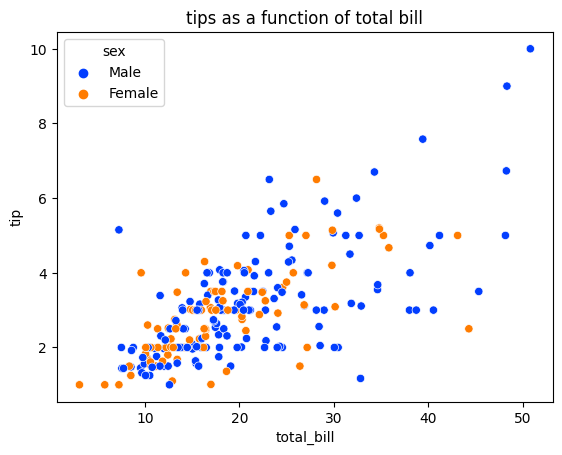

In [20]:
sns.scatterplot(data=df_tips, x="total_bill", y="tip", hue='sex')
plt.title('tips as a function of total bill');

Example of a BAD plot:

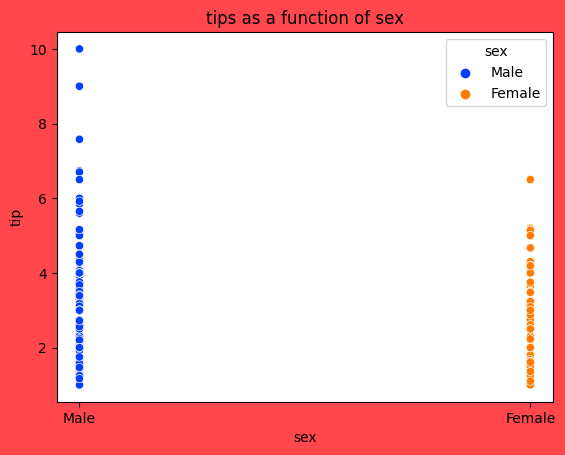

In [21]:
plt.figure(facecolor='xkcd:light red')
sns.scatterplot(data=df_tips, x="sex", y="tip", hue='sex')
plt.title('tips as a function of sex');

2. **Continuous vs. Discrete / Categorical**

    Common plots - Box plot plot, KDE plot by group, Histogram by group
    
    **You can use this with numerical discrete vs. categorical if the discrete feature has enough unique values
    
    *Example:*

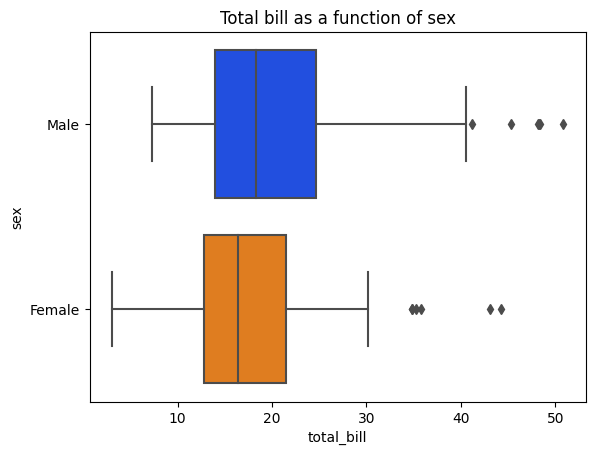

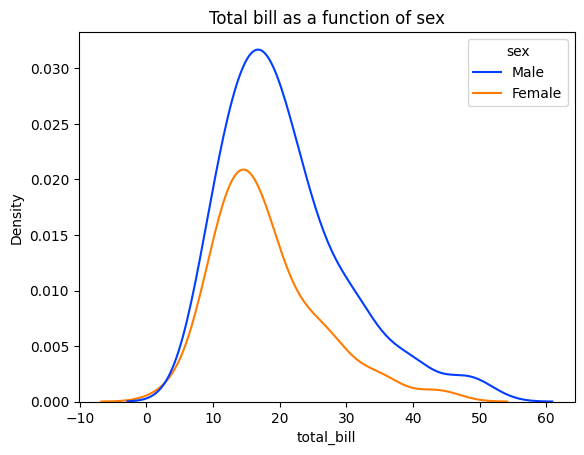

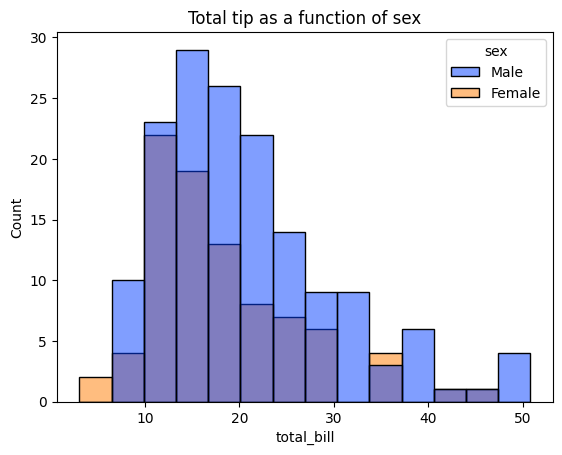

In [22]:
sns.boxplot(data=df_tips, x="total_bill", y="sex")
plt.title('Total bill as a function of sex')
plt.show()
sns.kdeplot(data=df_tips, x="total_bill", hue="sex")
plt.title('Total bill as a function of sex')
plt.show()
sns.histplot(data=df_tips, x="total_bill", hue="sex");
plt.title('Total tip as a function of sex');

Example of BAD plots:

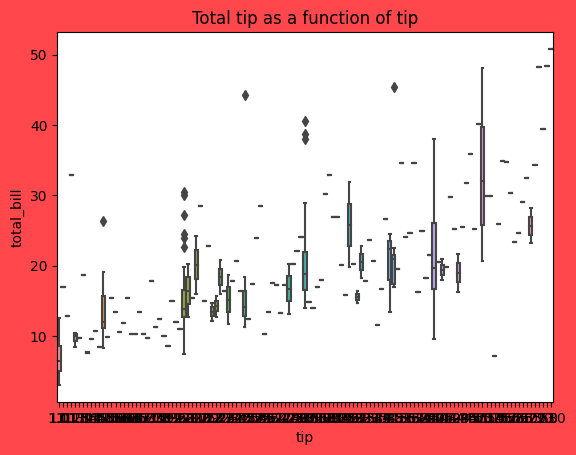

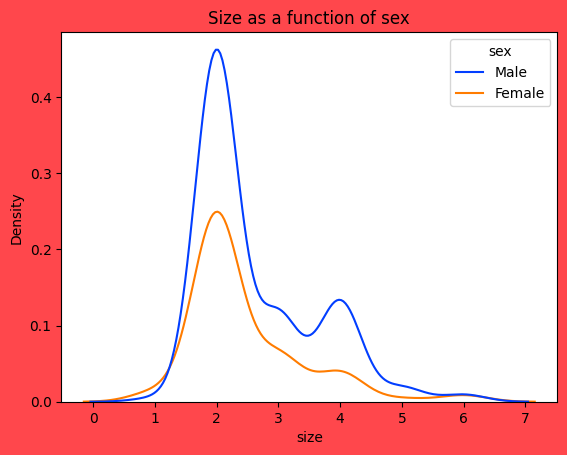

In [23]:
plt.figure(facecolor='xkcd:light red')
sns.boxplot(data=df_tips, x="tip", y="total_bill")
plt.title('Total tip as a function of tip')
plt.show()
plt.figure(facecolor='xkcd:light red')
sns.kdeplot(data=df_tips, x="size", hue="sex")
plt.title('Size as a function of sex')
plt.show()

3. **Discrete / Categorical vs. Discrete / Categorical**

    Common plots - bar plot
    
    *Example:*

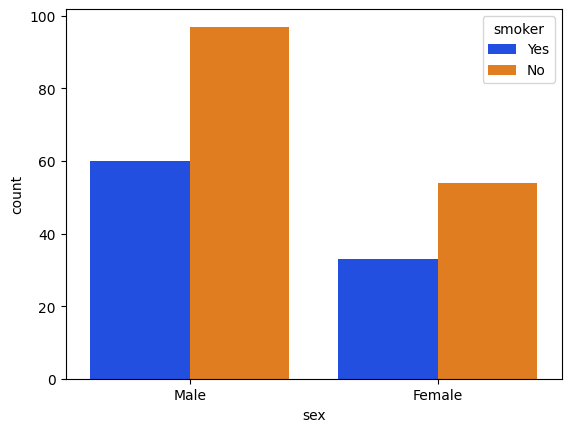

In [24]:
sns.countplot(data=df_tips, x="sex", hue="smoker");

Example of BAD plots:

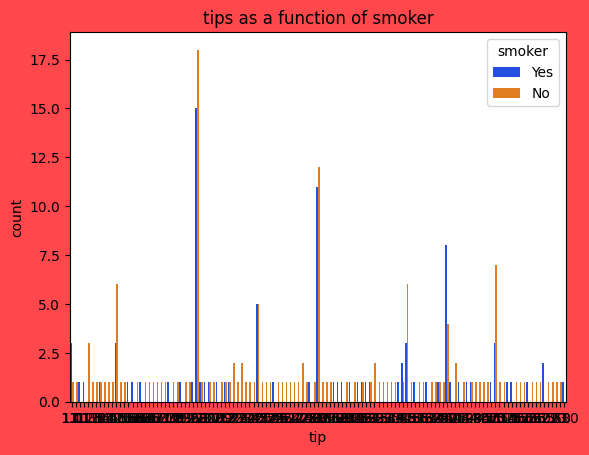

In [25]:
plt.figure(facecolor='xkcd:light red')
sns.countplot(data=df_tips, x="tip", hue="smoker")
plt.title('tips as a function of smoker');

### Looking at data distributions of the features against the dependent variable

Often, it is useful to look at the independent features, in comparison to the dependent variable, to see any immidiate relations, get a feeling of that to expect, and derive business conclusions for our business stake-holders.

#### Categorical features vs. `survived` in the titanic dataset

In [26]:
pd.crosstab(df['pclass'],df['survived']).apply(lambda x : round(x/x.sum(),2),axis = 1)

survived,0,1
pclass,,
1,0.38,0.62
2,0.57,0.43
3,0.74,0.26


In [27]:
# crosstab percentage tables for the categorical variables X survived

CAT_FEATS = ['pclass', 'sex','embarked']
for cat_var in CAT_FEATS:
    display(pd.crosstab(df[cat_var],df['survived']).apply(lambda r: round(r/r.sum(),2), axis=1))


survived,0,1
pclass,,
1,0.38,0.62
2,0.57,0.43
3,0.74,0.26


survived,0,1
sex,,
female,0.27,0.73
male,0.81,0.19


survived,0,1
embarked,,
C,0.44,0.56
Q,0.64,0.36
S,0.67,0.33


In [28]:
pd.crosstab(df[cat_var],df['survived']) # how many samples are a certain value of embarked and survived

survived,0,1
embarked,,
C,120,150
Q,79,44
S,610,304


This is useful, but hard to understand. It would be more beneficial to plot these crosstabs. So the barplot is our rescue.

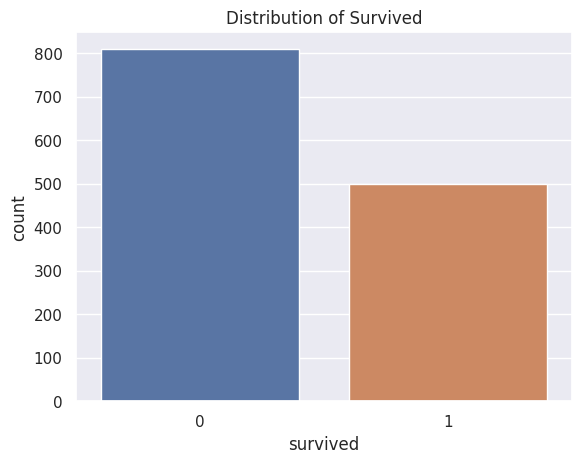

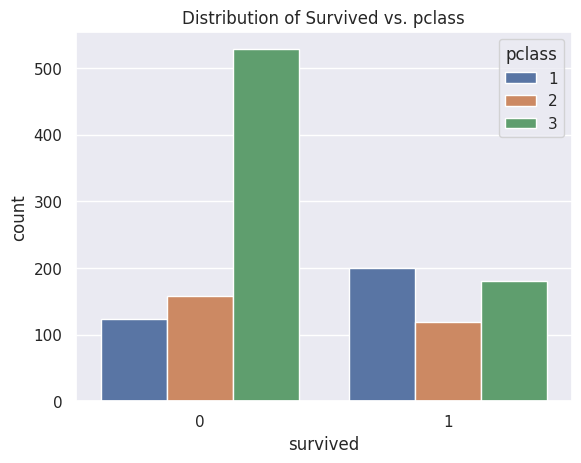

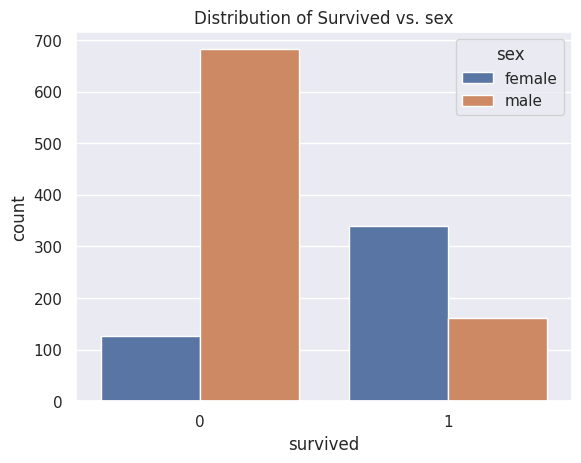

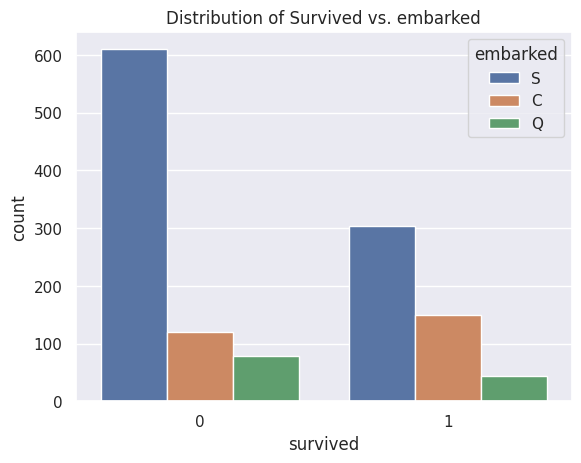

In [29]:
sns.set(style="darkgrid")

ax = sns.countplot(x = "survived", data=df)
plt.title('Distribution of Survived')
plt.show()

for cat_var in CAT_FEATS:
    ax = sns.countplot(x = df.survived,  hue = df[cat_var], data=df)
    plt.title('Distribution of Survived vs. {}'.format(cat_var))
    plt.show()

Another nice way to look at the data, is by percentage, e.g. what is the percentage of the people who survived, were Female? Let's plot the percentage of values. Do not forget to ease your customer by annotating:

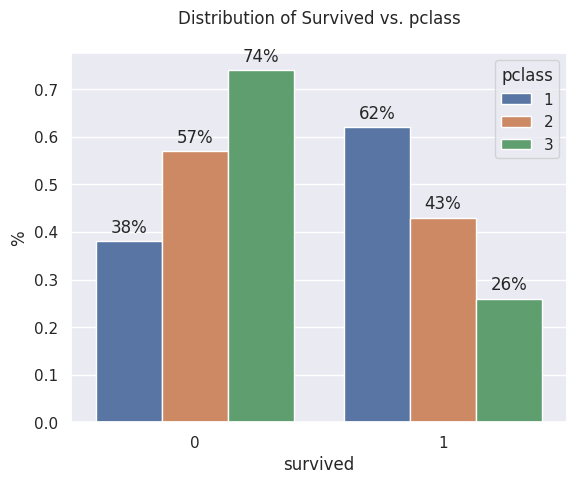

In [30]:
FEAT = 'pclass'

# calculating the percentages
data = pd.DataFrame(pd.crosstab(df[FEAT],df['survived']).\
                    apply(lambda r: round(r/r.sum(),2), axis=1).unstack()).\
                    reset_index()

# plotting
g = sns.barplot(x = data['survived'], y=data[0], hue = data[FEAT])
plt.title('Distribution of Survived vs. {}\n'.format(FEAT))
plt.ylabel('%')

# plotting the tags above the bars
for p in g.patches:
    g.annotate(format(p.get_height(), '.0%'), \
               (p.get_x() + p.get_width() / 2., \
                p.get_height()), \
               ha = 'center', \
               va = 'center', \
               xytext = (0, 10), \
               textcoords = 'offset points')

we can see that:
1. the vast majority of pclass 3 didn't survive. In the contrary most of pclass 1 survived
2. most of the female survived while most of the men didn't
3. most of the passangers that embarked in Cherbourg survived, in compare to ~33% in the other ports

#### Continuous features vs. `survived` in the totnic dataset

For numerical features, it's better to look on survival **rates** (average)

In [31]:
# ratio scale data
df[['age', 'sibsp', 'parch', 'fare','survived']].groupby('survived')\
                                                      .agg(['mean', 'median',
                                                            'std'])

age                       sibsp                      parch  \
               mean median        std      mean median       std      mean   
survived                                                                     
0         30.545369   28.0  13.922539  0.521632    0.0  1.210449  0.328801   
1         28.918228   28.0  15.061481  0.462000    0.0  0.685197  0.476000   

                                fare                    
         median       std       mean median        std  
survived                                                
0           0.0  0.912332  23.353831   10.5  34.145096  
1           0.0  0.776292  49.361184   26.0  68.648795

We can see from the centred measures that:
1. Age - there is no noticable difference
2. Number of siblings/spouses aboard - mean is larger in those who didn't survive, however distributaion is skewed
3. Number of parents/children aboard - mean is much larger in those who survived, however distributaion is skewed

Let's put the data on a plot:

In [32]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


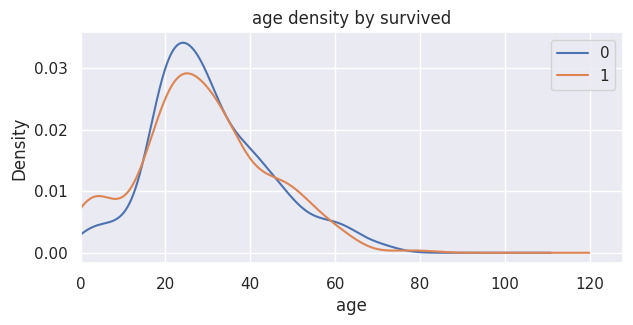

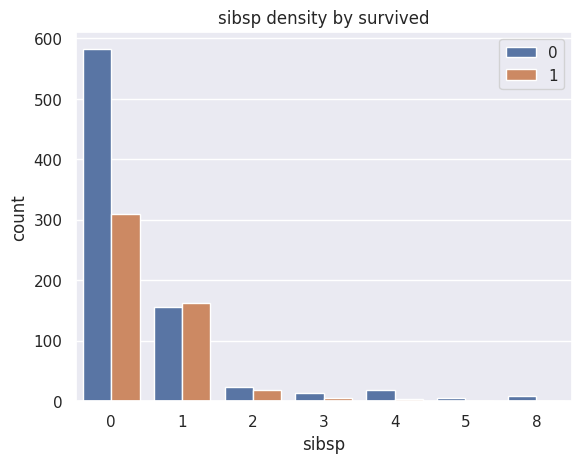

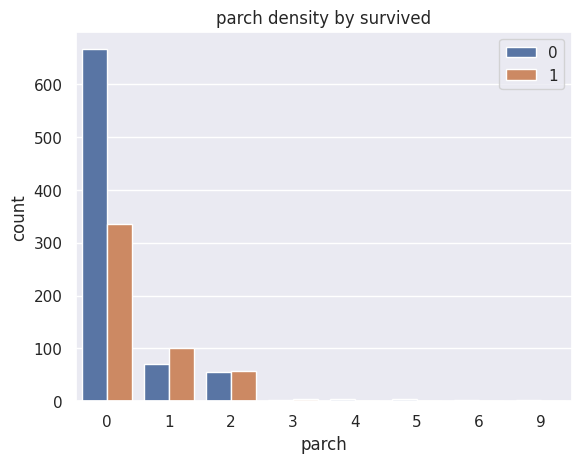

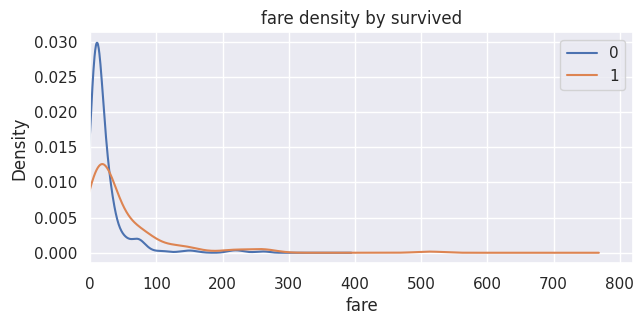

In [33]:
NUM_FEATS = ['age', 'sibsp', 'parch', 'fare']

for num_feat in NUM_FEATS:
    if num_feat not in ['sibsp', 'parch']: # categorical features
        df.groupby('survived')[num_feat].plot(kind='kde', figsize=(7, 3))
        plt.xlim(0, )
    else:
        sns.countplot(x=num_feat, hue="survived", data=df)

    plt.legend(loc = 'upper right')
    plt.title(num_feat + ' density by survived')
    plt.xlabel(num_feat)
    plt.show()

### Inter-correlations between independent features

Another important thing, is looking at the inner correlations between our features. We won't get into why now, but it will have significance in the future. Moreover, it is interesting to check if our assumptions of the data are met, and find patterns in the data.

We will again divide the plot according to the data types.

#### Continuous vs. continuous features (discrete if you have enough unique values)

One thing we can do, in order to show an overview of the correlations between the **numerical features**, is the correlation matrix. The default presents the pearson correlation, but we can change it to a spearman correlation for example:

<div class="alert alert-warning"><b>Note:</b> We will NOT be using ordinal features in the pearson correlation matrix. You CAN however include them if you are using the <i>Spearman</i> correlation. Please DO NOT include binary / nominal features in the correlation matrix.</div>



In [34]:
NUM_FEATS

['age', 'sibsp', 'parch', 'fare']

In [35]:
df[NUM_FEATS].corr()

,age,sibsp,parch,fare
age,1.000000,-0.243699,-0.150917,0.178739
sibsp,-0.243699,1.000000,0.373587,0.160238
parch,-0.150917,0.373587,1.000000,0.221539
fare,0.178739,0.160238,0.221539,1.000000


We can also add color if we want:

In [36]:
def color_map(val):
    color = 'red' if abs(float(val)) < 0.16 else 'green' \
    if abs(float(val)) > 0.4  else 'black'
    return 'color: %s' % color

corr = df[NUM_FEATS].corr()
df_styled = corr.style.applymap(color_map)
df_styled

,age,sibsp,parch,fare
age,1.000000,-0.243699,-0.150917,0.178739
sibsp,-0.243699,1.000000,0.373587,0.160238
parch,-0.150917,0.373587,1.000000,0.221539
fare,0.178739,0.160238,0.221539,1.000000


A nicer view can be created using seaborn:

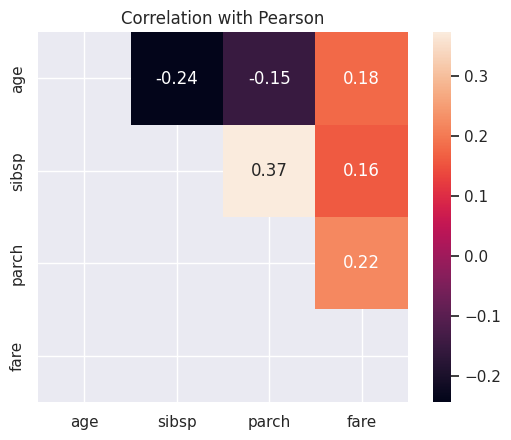

In [37]:
mask = np.tril(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr,
                 annot=True,
                 fmt=".2f",
                 mask = mask, square = True)
plt.title('Correlation with Pearson');

<ipython-input-38-e63287063928>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_spearman = df[NUM_FEATS+CAT_FEATS+['survived']].corr(method='spearman')


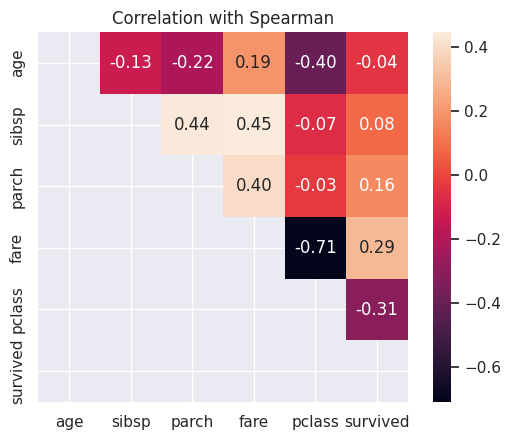

In [38]:
df_corr_spearman = df[NUM_FEATS+CAT_FEATS+['survived']].corr(method='spearman')
mask = np.tril(np.ones_like(df_corr_spearman, dtype=bool))
ax = sns.heatmap(df_corr_spearman,
                 annot=True,
                 fmt=".2f",
                 mask = mask, square = True)
plt.title('Correlation with Spearman');

Example of a BAD plot:

<ipython-input-39-21536ffd4809>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.tril(np.ones_like(df[NUM_FEATS+CAT_FEATS+['survived']].corr(), dtype=bool))
<ipython-input-39-21536ffd4809>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df[NUM_FEATS+CAT_FEATS+['survived']].corr(),


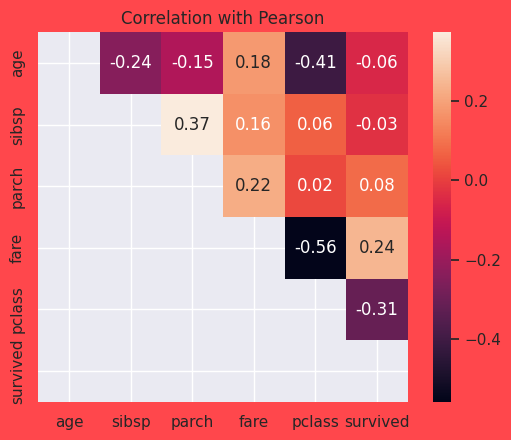

In [39]:
mask = np.tril(np.ones_like(df[NUM_FEATS+CAT_FEATS+['survived']].corr(), dtype=bool))
plt.figure(facecolor='xkcd:light red')
ax = sns.heatmap(df[NUM_FEATS+CAT_FEATS+['survived']].corr(),
                 annot=True,
                 fmt=".2f",
                 mask = mask, square = True)
plt.title('Correlation with Pearson');

We can also see the relations more graphically:

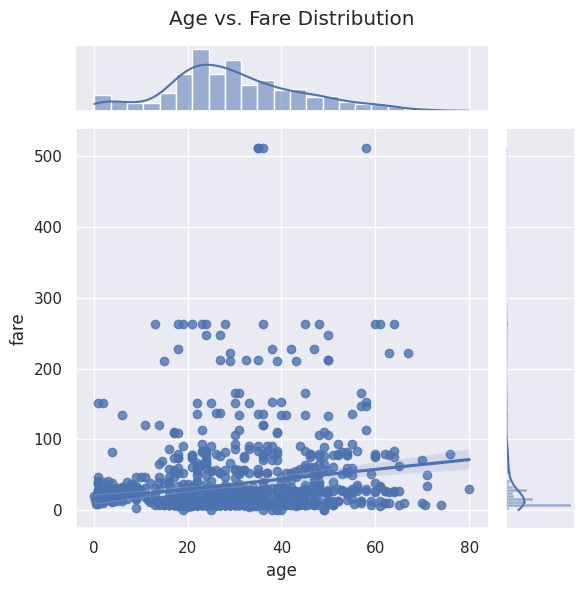

In [40]:
p = sns.jointplot(x="age", y="fare", data=df, kind='reg')
p.fig.suptitle("Age vs. Fare Distribution")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.92)

A quicker but more time consuming way to plot a visual correlation matrix:

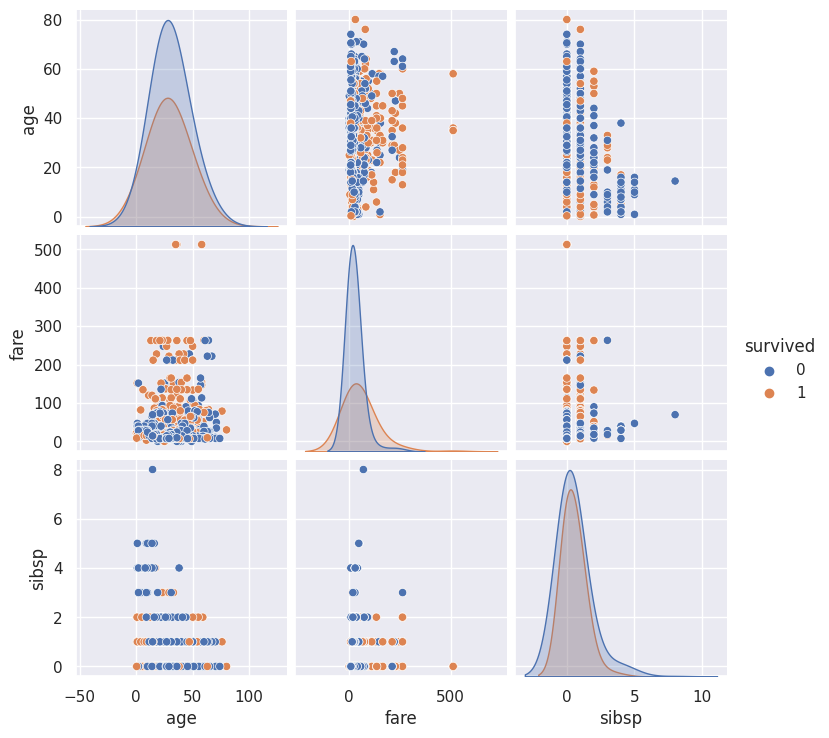

In [41]:
np.seterr(divide='ignore', invalid='ignore')

sns.pairplot(df[['age', 'fare', 'survived', 'sibsp']].dropna(),
             hue='survived', height=2.5, diag_kws={'bw_method': 1});

#### Continuous vs. categorical features in the titanic dataset (can also be used for discrete if you have enough values)

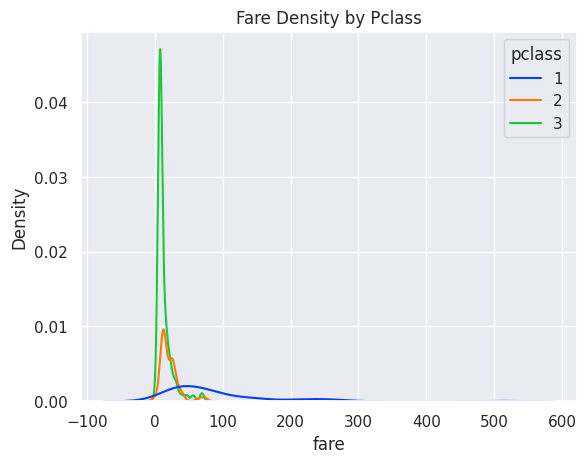

In [42]:
sns.kdeplot(data=df, x="fare", hue="pclass",
            palette=sns.color_palette("bright")[:len(set(df['pclass']))])
plt.title('Fare Density by Pclass');

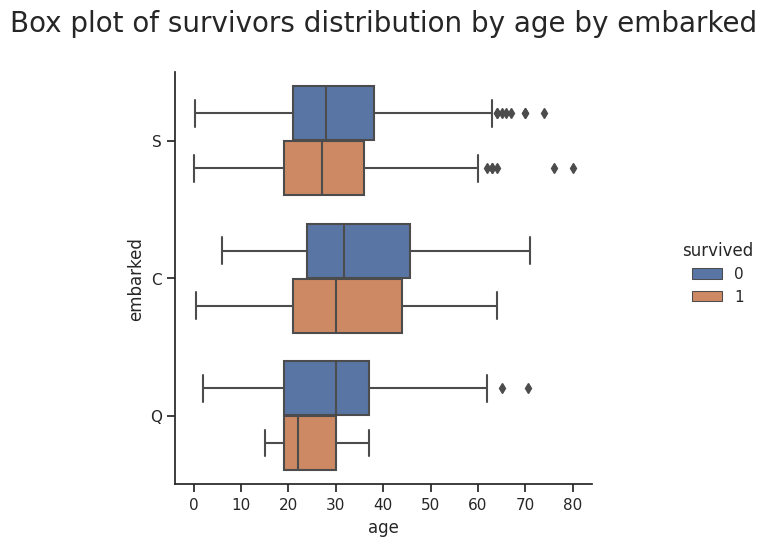

In [43]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="age", y="embarked", hue="survived", data=df, kind="box")
    g.set_axis_labels("age", "embarked")
    plt.title('Box plot of survivors distribution by age by embarked\n', \
              fontdict = {'size':20});

We can see that the `embark` and `age` columns are not corelated, but that there is a non linear connection between `age` and `survived`, and `embarked` and `survived`.


#### Categorical vs. categorical features in the titanic dataset

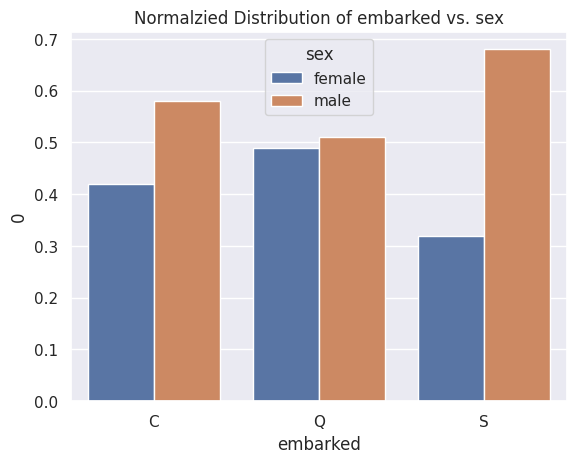

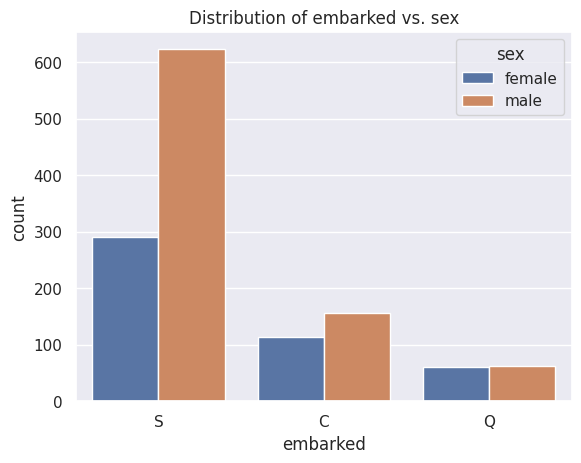

In [44]:
data_embarked_vs_sex = pd.DataFrame(pd.crosstab(df['embarked'],df['sex']).\
                    apply(lambda r: round(r/r.sum(),2), axis=1).unstack()).\
                    reset_index()

ax = sns.barplot(x = "embarked",  y = data_embarked_vs_sex[0], hue = "sex",
                 data=data_embarked_vs_sex)
plt.title('Normalzied Distribution of embarked vs. sex')
plt.show()
sns.countplot(x = "embarked",  hue = "sex", data=df)
plt.title('Distribution of embarked vs. sex');

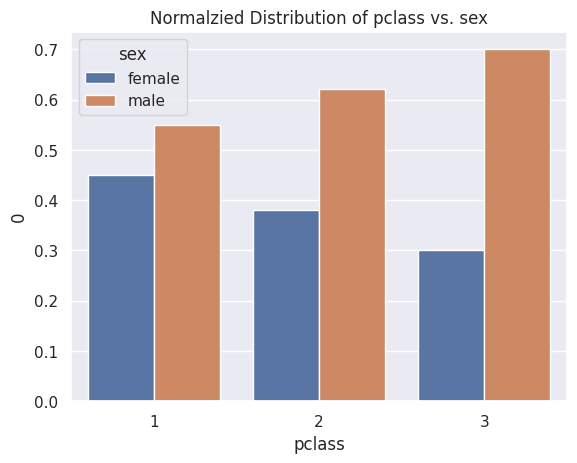

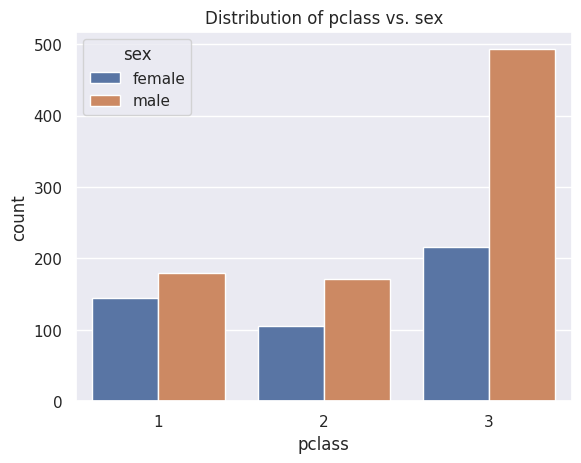

In [45]:
data_pclass_vs_sex = pd.DataFrame(pd.crosstab(df['pclass'],df['sex']).\
                    apply(lambda r: round(r/r.sum(),2), axis=1).unstack()).\
                    reset_index()
ax = sns.barplot(x = "pclass",  y = data_pclass_vs_sex[0], hue = "sex",
                 data=data_pclass_vs_sex)
plt.title('Normalzied Distribution of pclass vs. sex')
plt.show()
sns.countplot(x = "pclass",  hue = "sex", data=df)
plt.title('Distribution of pclass vs. sex');

# Feature Extraction

We can sometimes make more out of our features. Some features do not make sense to use "as is", some features could use combining with others.

Can you think of some options?

Here is one:

The name feature has no meaning on it's own, since we are looking at a statistical model. However, maybe the number of letters in the name can help us? Maybe the longer the name. the more upper-class they are in society? Maybe vice-versa?

In [46]:
df['name_length_in_c'] = [len(x) for x in df['name']]

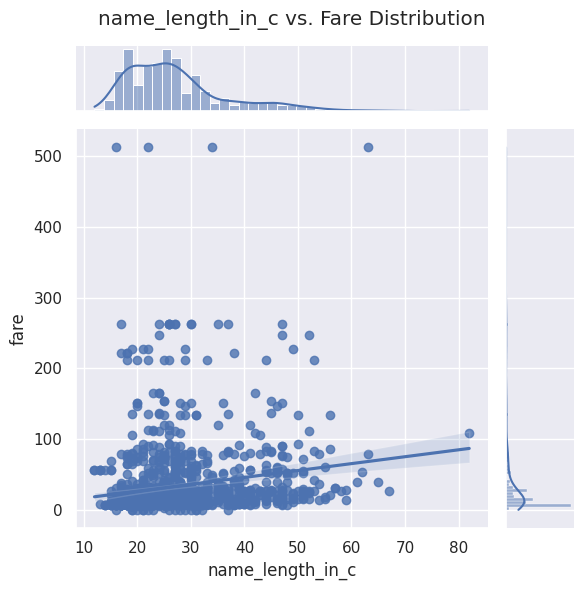

In [47]:
p = sns.jointplot(x="name_length_in_c", y="fare", data=df, kind='reg')
p.fig.suptitle("name_length_in_c vs. Fare Distribution")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.92)

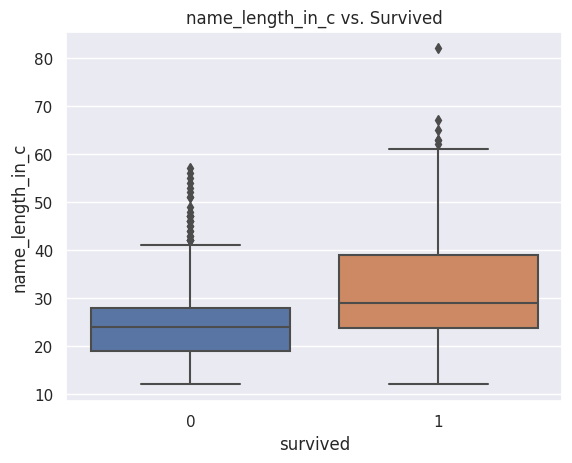

In [48]:
sns.boxplot(data = df, y="name_length_in_c", x="survived")
plt.title("name_length_in_c vs. Survived");

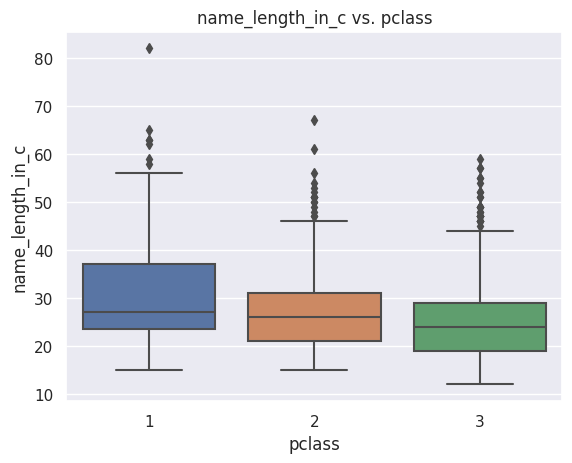

In [49]:
sns.boxplot(data = df, y="name_length_in_c", x="pclass")
plt.title("name_length_in_c vs. pclass");

We can see a small correlation with the `fare`, a clear correlation with `survived` which is super interesting, and a clear negative correlation with `pclass`, which verifies our assumption.

## Exercise - For submission TODAY (Core)

1. Take the time to create 3 additional features.

2. Plot their distribution and give some summary statistics - mean, median and more (think of a function that does this)

3. How are they correlated to other features that exist in the DataFrame? What is theit relation with the dependent variable?

4. Are they categorical (nominal / ordinal) / numerical (discrete / continuous) features?

5. What was your logic behind adding these features?

## FIRST FEATURE

In [50]:
def type_of_people(age):
  if 0 < age < 10:
    return  1
  elif 10 <= age < 18:
    return 2
  elif 18 <= age < 30:
    return 3
  elif 30 <= age < 50:
    return  4
  elif 50 <= age < 70:
    return  5
  elif age >= 70:
    return  6



df['type_of_people'] = [type_of_people(age) for age in df['age']]




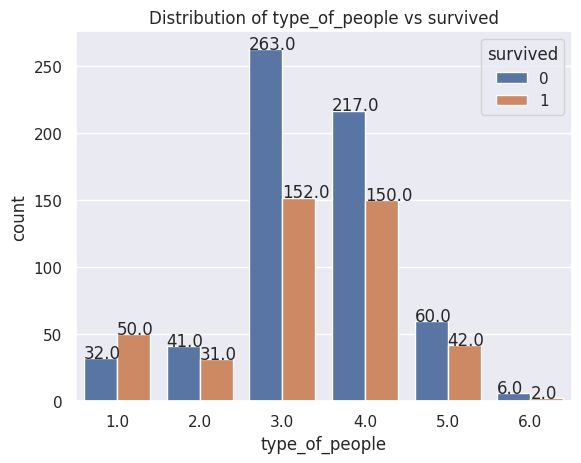

In [51]:
ax = sns.countplot(data = df, x = 'type_of_people',hue = 'survived')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.title('Distribution of type_of_people vs survived')
plt.show()

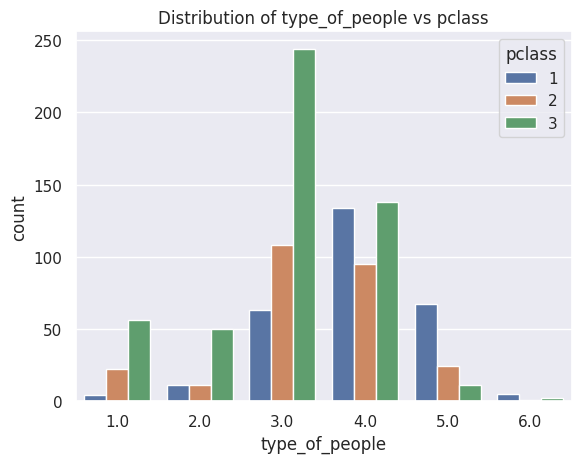

In [52]:
ax = sns.countplot(data = df, x = 'type_of_people',hue = 'pclass')
plt.title('Distribution of type_of_people vs pclass')
plt.show()

In [53]:
stat_info = df.type_of_people.describe()
print(f"mean = {stat_info['mean']}, std = {stat_info['std']}, median = {stat_info['50%']}")

mean = 3.3432122370936903, std = 1.0370120894052288, median = 3.0


In [54]:
ind_feats = ['fare','parch','sibsp','type_of_people']
df_corr_spearman = df[ind_feats].corr(method = 'spearman') # spearman because type_of_people is a categorical ordinal feature
df_corr_spearman['type_of_people']

fare              0.166233
parch            -0.241777
sibsp            -0.149840
type_of_people    1.000000
Name: type_of_people, dtype: float64

type_of_people is positively correlated to fare which makes sens as in general the price is increasing with the age.
type_of_people is negatively correlated to parch and sibsp.
It also makes sense. The older the passenger is, the less chance he has to have parents aboard because they are old (maybe dead). We saw on the graph that there is not a lot of young people aboard so parents have less chance to have childrens aboard. It explains the high negative correlation between parch and type_of_people.

Same reasoning for sibsp.  


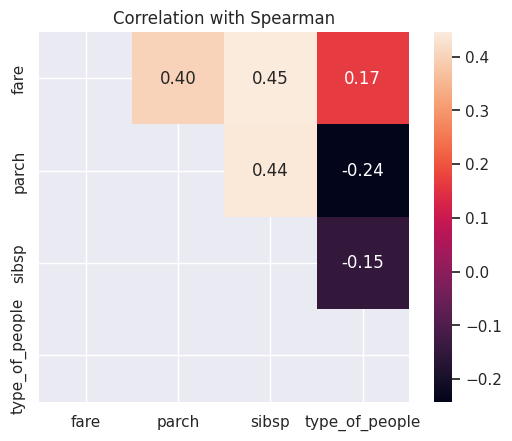

In [55]:
mask = np.tril(np.ones_like(df_corr_spearman, dtype=bool))
ax = sns.heatmap(df_corr_spearman,
                 annot=True,
                 fmt=".2f",
                 mask = mask, square = True)
plt.title('Correlation with Spearman');

In [56]:
dep_feats = ['type_of_people','survived']
df[dep_feats].corr(method = 'spearman')

,type_of_people,survived
type_of_people,1.000000,-0.042627
survived,-0.042627,1.000000


The correlation with the dependant variable 'survived' is almost null.
It can makes sense because we can assume that between 0 and 40, the older we are, the higher we have chance to survive as we are getting stronger, smart,...
However, between 40 and 80, the older we are, the less we have chance to survive as we are maybe running slower, in a bad shape,...
Then, the increasing and then decreasing of the chance to survive can cancel the correlation.

'type_of_people' is a categorical ordinal feature as order have a meaning

By adding this feature, i wanted to exploit the feature 'age' and categorize it in order to get information on the chance to survive for each category of people(child, teenager, adult,senior)

## SECOND FEATURE

Text(0.5, 1.0, 'Distribution of family_size vs survived')

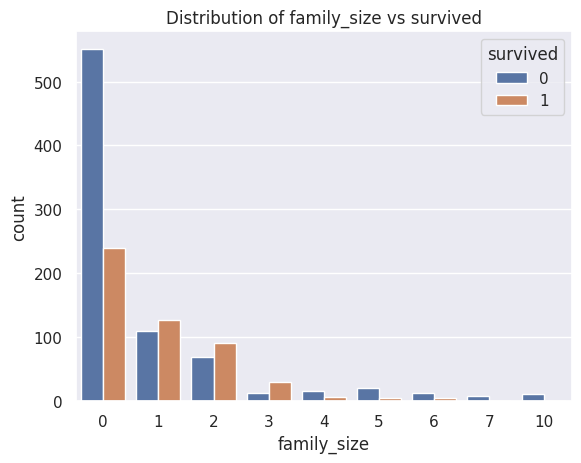

In [57]:
df['family_size'] = df.sibsp + df.parch
ax = sns.countplot(data = df, x = 'family_size', hue ='survived')
plt.title('Distribution of family_size vs survived')

Text(0.5, 1.0, 'Distribution of family_size vs pclass')

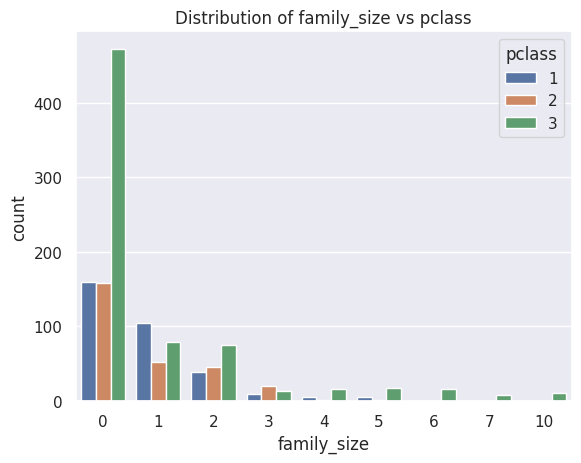

In [58]:
ax = sns.countplot(data = df, x = 'family_size', hue ='pclass')
plt.title('Distribution of family_size vs pclass')

Text(0.5, 1.0, 'Boxplot of family_size distribution by survivors')

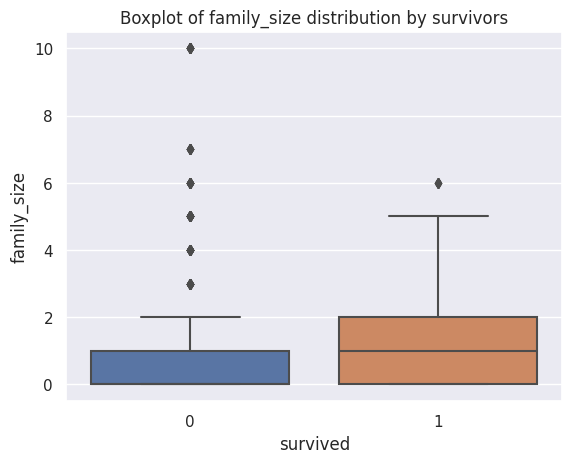

In [59]:
sns.boxplot(data = df, x = 'survived', y = 'family_size')
plt.title('Boxplot of family_size distribution by survivors')

In [60]:
stat_fam_size_info = df.family_size.describe()
print(f"mean = {stat_fam_size_info['mean']}, std = {stat_fam_size_info['std']}, median = {stat_fam_size_info['50%']}")


mean = 0.8838808250572956, std = 1.5836390865436092, median = 0.0


In [61]:
ind_feats = ['fare','age', 'name_length_in_c','family_size']
df[ind_feats].corr()['family_size']

fare                0.226492
age                -0.240230
name_length_in_c    0.220897
family_size         1.000000
Name: family_size, dtype: float64

family_size is positively correlated to fare and name_length_in_c.

It makes sense because a big family have to take a big room so ticket is more expensive than for a smaller family.

We can maybe think that families with a large name will have more money so they will travel with many member of the family. It can explain the positive correlation between family size and name_length_in_c.

family_size and age are negatively correlated.
It makes sense because when family_size is high, it means that many children from this family were in the boat so age is decreasing.

In [62]:
dep_feats = ['family_size','survived']
df[dep_feats].corr(method = 'spearman')

,family_size,survived
family_size,1.000000,0.170109
survived,0.170109,1.000000


The correlation between family_size and survived is around 17% so we have a significant positive correlation between both.




family_size is a numerical discrete feature.

I thought before adding this feature that the more family size is significant, the more each member of the family can help the other and then survive.


### THIRD FEATURE

In [63]:
dict_letter = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8}
df['first_cabin_letter']= [dict_letter[x[0]] if isinstance(x,str) else None for x in df.cabin]


Text(0.5, 1.0, 'Distribution of first_cabin_letter vs survived')

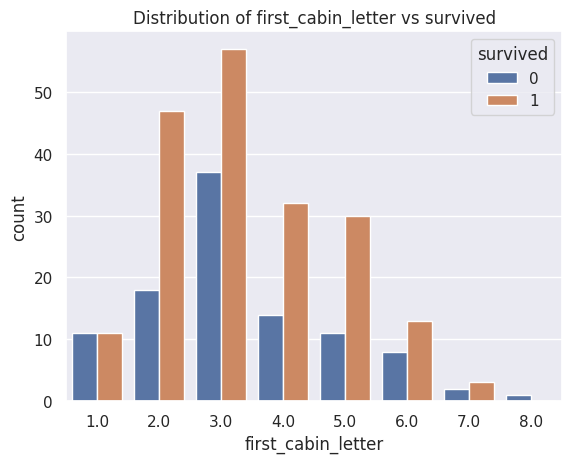

In [64]:
sns.countplot(data = df, x = 'first_cabin_letter',hue='survived')
plt.title('Distribution of first_cabin_letter vs survived')

In [65]:
stat_first_cab_letter = df.first_cabin_letter.describe()
print(f"mean = {stat_first_cab_letter['mean']}, std = {stat_first_cab_letter['std']}, median = {stat_first_cab_letter['50%']}")


mean = 3.3627118644067795, std = 1.4500643083422697, median = 3.0


In [66]:
indep_feats = ['fare','age','first_cabin_letter']
df[indep_feats].corr(method ='spearman')['first_cabin_letter']

fare                 -0.350658
age                  -0.139255
first_cabin_letter    1.000000
Name: first_cabin_letter, dtype: float64

first_cabin_letter is significantly negatively correlated to fare.
We can deduce that cabin starting with A are the most expensive.

first_cabin_letter is significantly negatively correlated to age.
We can deduce that the more people are old, the more they booked an expensive cabin.

In [67]:
dep_feats = ['first_cabin_letter','survived']
df[dep_feats].corr(method = 'spearman')

,first_cabin_letter,survived
first_cabin_letter,1.00000,0.02585
survived,0.02585,1.00000


first_cabin_letter and survived are not correlated, which can be surprising because we can think that people with better cabin have better chance to espace in case of an emergency. This result can maybe be explained by the lot of nan values on this feature.

I thought we could make a link between the range of the cabin and the chance to survive that is why i took the first letter of each cabin.